### House Price Prediction (Linear Regression) 

##### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##### Data collection and processing

In [17]:
house_data = pd.read_csv('House Price.csv')
house_data.head()
house_data.dtypes
v1 = lambda x:float(x[:1])
house_data.title = house_data.title.apply(v1)

ValueError: could not convert string to float: 'D'

In [54]:
house_data.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0
24325,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0


##### Checking missing values


In [55]:
 house_data.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [56]:
house_data['state'].value_counts()

Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9
Kogi               8
Cross River        2
Plateau            2
Kano               2
Katsina            2
Bayelsa            2
Borno              2
Niger              1
Name: state, dtype: int64

##### Creating the X and Y columns

In [57]:
X = house_data.drop(['price'], axis = 1)
y = house_data['price']

In [58]:
print(X)
print(y)

       bedrooms  bathrooms  toilets  parking_space                 title  \
0             6          5        5              4       Detached Duplex   
1             4          5        5              4     Terraced Duplexes   
2             4          5        5              4       Detached Duplex   
3             4          4        5              6       Detached Duplex   
4             4          4        5              2  Semi Detached Duplex   
...         ...        ...      ...            ...                   ...   
24321         2          2        2              4        Block of Flats   
24322         4          5        5              4        Block of Flats   
24323         4          5        5              4       Detached Duplex   
24324         3          4        4              3        Block of Flats   
24325         4          5        5              4       Detached Duplex   

                       town  state  
0                   Mabushi  Abuja  
1            

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
predictions = model.predict(X_test)

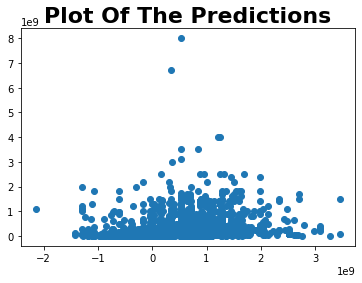

In [67]:
plt.title('Plot Of The Predictions', fontdict={f'fontweight':'bold', 'fontsize':22})
plt.scatter(predictions, y_test)
plt.show()

In [62]:
training_data = model.predict(X_train)
training_data

array([ 1.81795023e+09,  1.46832986e+08, -2.08964296e+08, ...,
        9.38831671e+08,  5.49412829e+08,  1.05123717e+07])

In [63]:
# R square error
score_1 = metrics.r2_score(y_train, training_data)
print('R square error : ', score_1)

R square error :  0.0011518354615221993


##### Visualising the data (atual price and the predicted price)

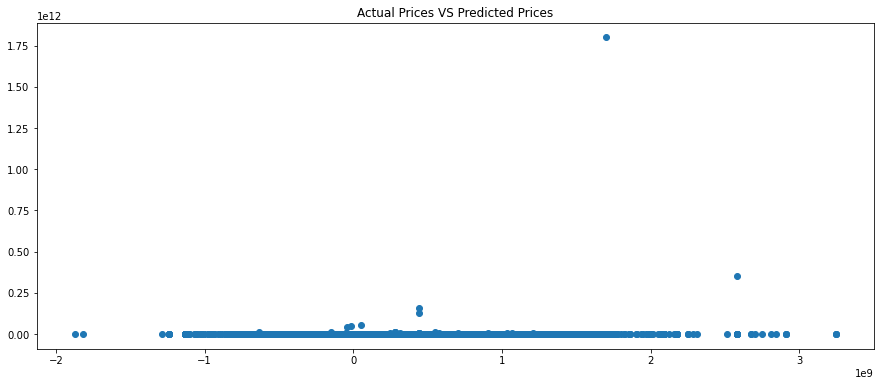

In [64]:
plt.figure(figsize=(15,6))
plt.scatter(training_data, y_train)
plt.title('Actual Prices VS Predicted Prices') 
plt.show()